# Installing Libraries

In [ ]:
!pip install pycaret
import pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 313.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.8 MB/s eta 0:00:00
   ━

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Loading Dataset

In [ ]:
data = pd.read_csv('/content/USA_Housing.csv')

## Preprocessing the Dataset

In [ ]:



imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05

# Using Clustering

In [ ]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(data)

# K means Clustering

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

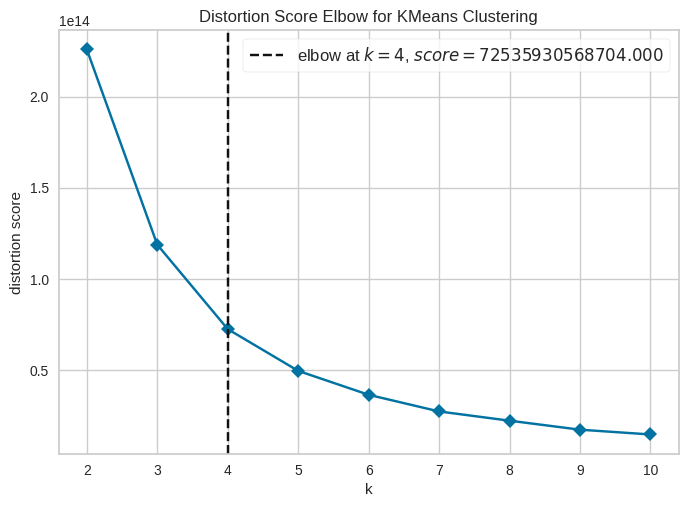

In [ ]:
setup(data, verbose=False)
r1 = []
r2 = []
r3 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r1.append(silhouette_score(data,labels))
r1.append(calinski_harabasz_score(data,labels))
r1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r2.append(silhouette_score(data,labels))
r2.append(calinski_harabasz_score(data,labels))
r2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r3.append(silhouette_score(data,labels))
r3.append(calinski_harabasz_score(data,labels))
r3.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

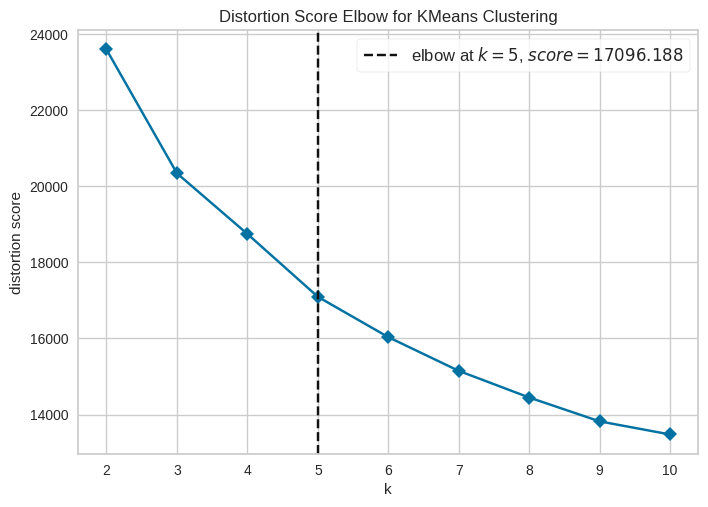

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r4.append(silhouette_score(data,labels))
r4.append(calinski_harabasz_score(data,labels))
r4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r5.append(silhouette_score(data,labels))
r5.append(calinski_harabasz_score(data,labels))
r5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r6.append(silhouette_score(data,labels))
r6.append(calinski_harabasz_score(data,labels))
r6.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

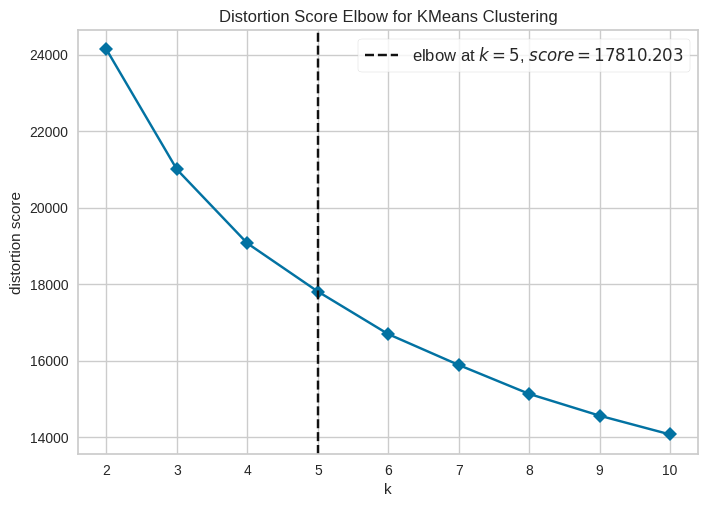

In [ ]:
setup(data = data, transformation = True, transformation_method = 'quantile', verbose=False)
r7 = []
r8 = []
r9 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r7.append(silhouette_score(data,labels))
r7.append(calinski_harabasz_score(data,labels))
r7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r8.append(silhouette_score(data,labels))
r8.append(calinski_harabasz_score(data,labels))
r8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r9.append(silhouette_score(data,labels))
r9.append(calinski_harabasz_score(data,labels))
r9.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')


PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

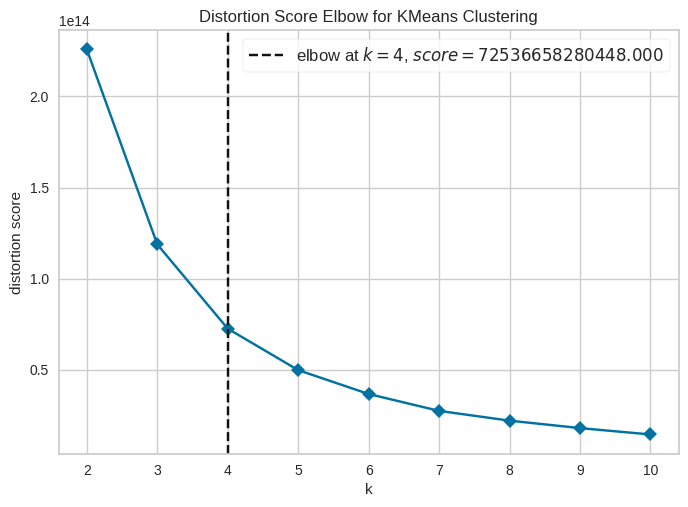

In [ ]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r10 = []
r11 = []
r12 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r10.append(silhouette_score(data,labels))
r10.append(calinski_harabasz_score(data,labels))
r10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r11.append(silhouette_score(data,labels))
r11.append(calinski_harabasz_score(data,labels))
r11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r12.append(silhouette_score(data,labels))
r12.append(calinski_harabasz_score(data,labels))
r12.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

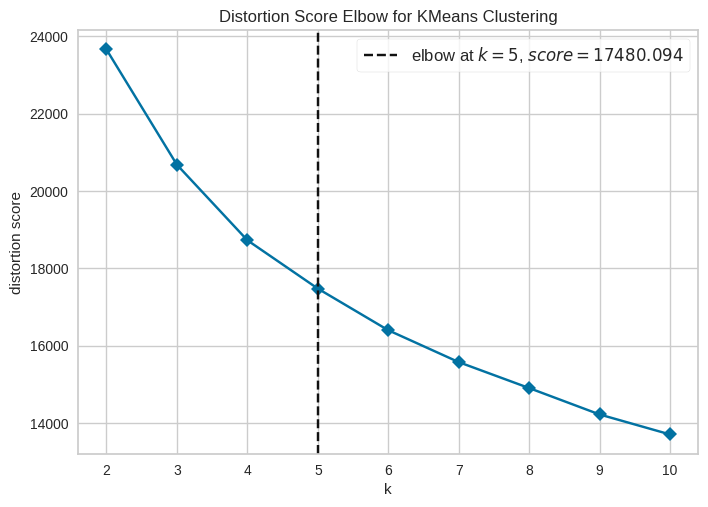

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'quantile', verbose=False)
r13 = []
r14 = []
r15 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r13.append(silhouette_score(data,labels))
r13.append(calinski_harabasz_score(data,labels))
r13.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r14.append(silhouette_score(data,labels))
r14.append(calinski_harabasz_score(data,labels))
r14.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r15.append(silhouette_score(data,labels))
r15.append(calinski_harabasz_score(data,labels))
r15.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

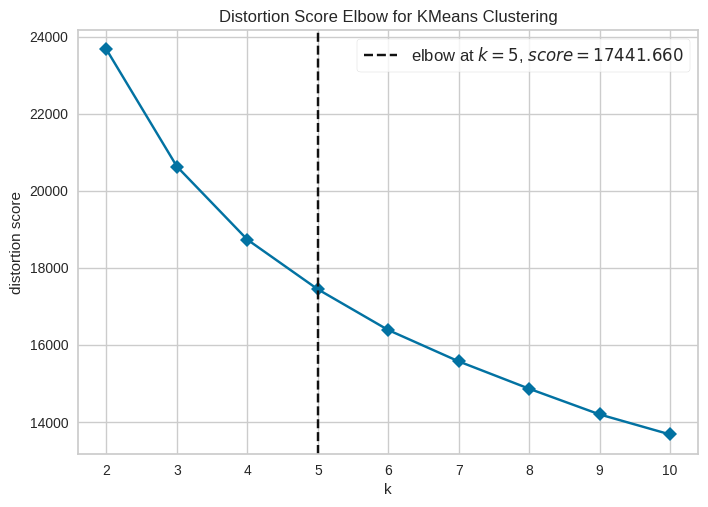

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'quantile',
      pca = True, pca_method = 'linear', verbose=False)

r16 = []
r17 = []
r18 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r16.append(silhouette_score(data,labels))
r16.append(calinski_harabasz_score(data,labels))
r16.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r17.append(silhouette_score(data,labels))
r17.append(calinski_harabasz_score(data,labels))
r17.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r18.append(silhouette_score(data,labels))
r18.append(calinski_harabasz_score(data,labels))
r18.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [ ]:
result1 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r1,'No Data Processing(c=4)': r2,'No Data Processing(c=5)': r3,
           'Using Normalization(c=3)' : r4,'Using Normalization(c=4)' : r5,'Using Normalization(c=5)' : r6,
           'Using Transform(c=3)' : r7,'Using Transform(c=4)' : r8,'Using Transform(c=5)' : r9,
           'Using PCA(c=3)' : r10,'Using PCA(c=4)' : r11,'Using PCA(c=5)' : r12,
           'Using T + N(c=3)': r13,'Using T + N(c=4)': r14,'Using T + N(c=5)': r15,
           'T + N + PCA(c=3)': r16,'T + N + PCA(c=4)': r17,'T + N + PCA(c=5)': r18}

In [ ]:
result1df = pd.DataFrame(result1)

# Hierarichal Clustering

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

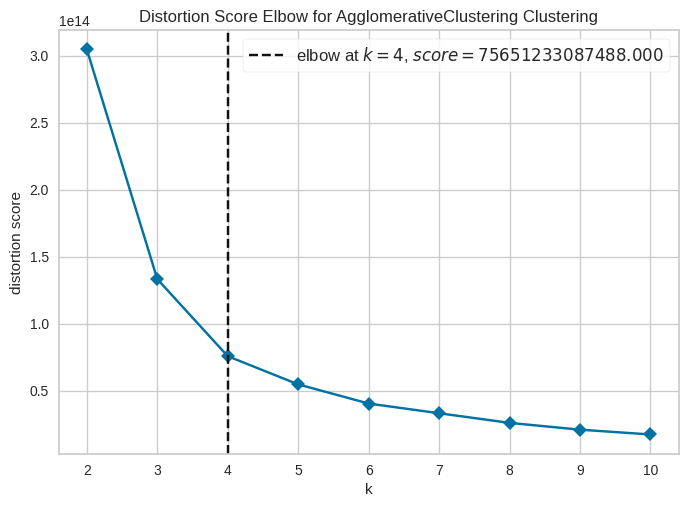

In [ ]:
setup(data, verbose=False)
r1 = []
r2 = []
r3 = []
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r1.append(silhouette_score(data,labels))
r1.append(calinski_harabasz_score(data,labels))
r1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r2.append(silhouette_score(data,labels))
r2.append(calinski_harabasz_score(data,labels))
r2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r3.append(silhouette_score(data,labels))
r3.append(calinski_harabasz_score(data,labels))
r3.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

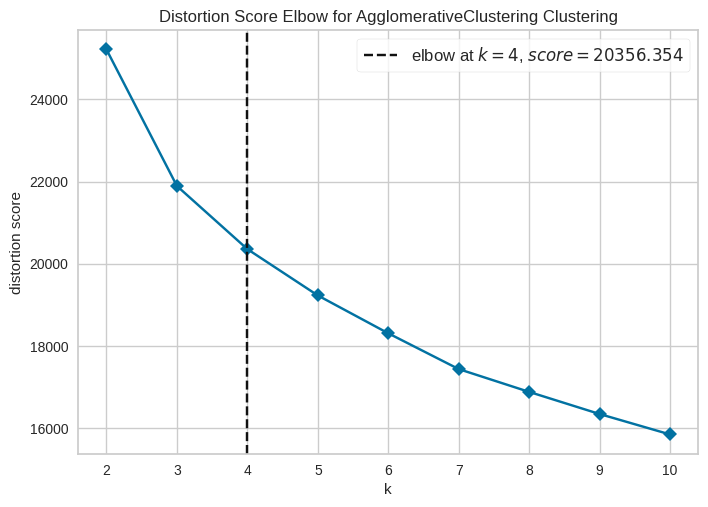

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r4.append(silhouette_score(data,labels))
r4.append(calinski_harabasz_score(data,labels))
r4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r5.append(silhouette_score(data,labels))
r5.append(calinski_harabasz_score(data,labels))
r5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r6.append(silhouette_score(data,labels))
r6.append(calinski_harabasz_score(data,labels))
r6.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

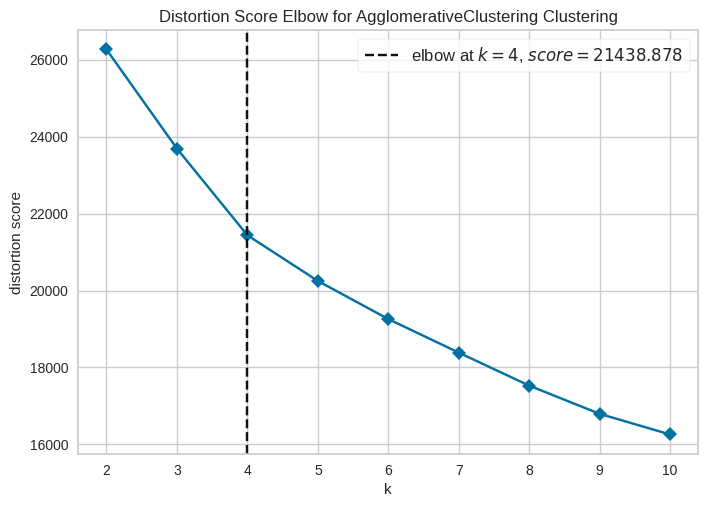

In [ ]:
setup(data = data, transformation = True, transformation_method = 'quantile', verbose=False)
r7 = []
r8 = []
r9 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r7.append(silhouette_score(data,labels))
r7.append(calinski_harabasz_score(data,labels))
r7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r8.append(silhouette_score(data,labels))
r8.append(calinski_harabasz_score(data,labels))
r8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r9.append(silhouette_score(data,labels))
r9.append(calinski_harabasz_score(data,labels))
r9.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

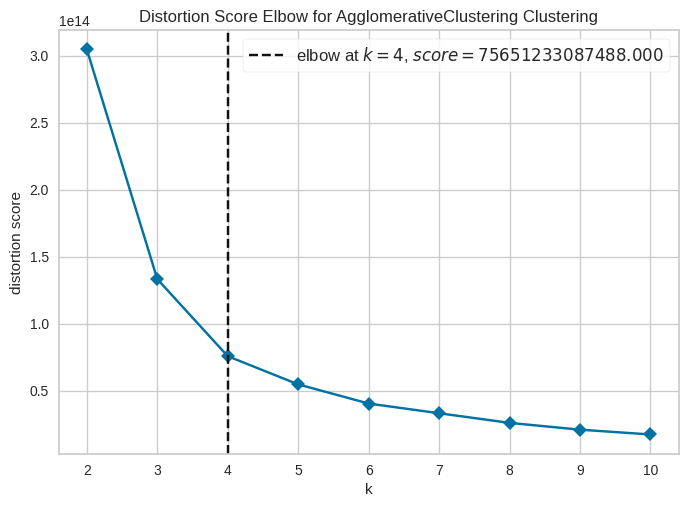

In [ ]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r10 = []
r11 = []
r12 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r10.append(silhouette_score(data,labels))
r10.append(calinski_harabasz_score(data,labels))
r10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r11.append(silhouette_score(data,labels))
r11.append(calinski_harabasz_score(data,labels))
r11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r12.append(silhouette_score(data,labels))
r12.append(calinski_harabasz_score(data,labels))
r12.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

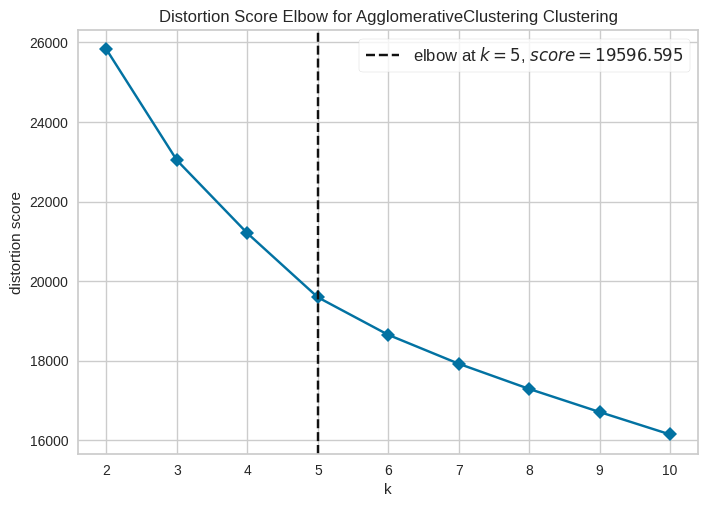

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'quantile', verbose=False)
r13 = []
r14 = []
r15 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r13.append(silhouette_score(data,labels))
r13.append(calinski_harabasz_score(data,labels))
r13.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r14.append(silhouette_score(data,labels))
r14.append(calinski_harabasz_score(data,labels))
r14.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r15.append(silhouette_score(data,labels))
r15.append(calinski_harabasz_score(data,labels))
r15.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

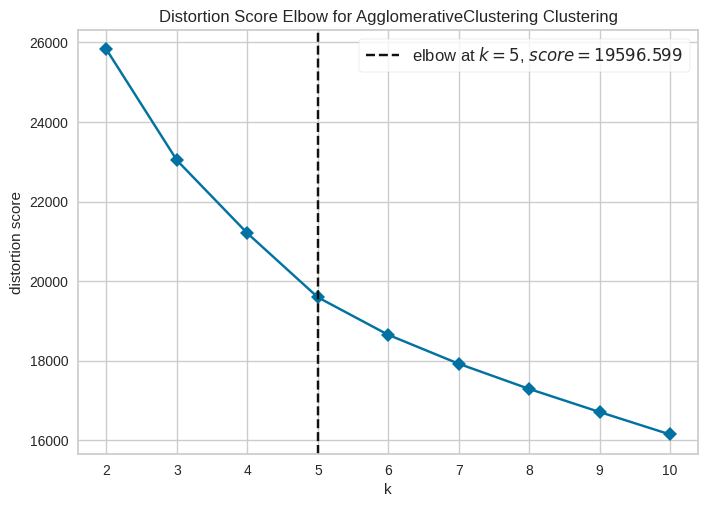

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'quantile',
      pca = True, pca_method = 'linear', verbose=False)

r16 = []
r17 = []
r18 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r16.append(silhouette_score(data,labels))
r16.append(calinski_harabasz_score(data,labels))
r16.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r17.append(silhouette_score(data,labels))
r17.append(calinski_harabasz_score(data,labels))
r17.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r18.append(silhouette_score(data,labels))
r18.append(calinski_harabasz_score(data,labels))
r18.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [ ]:
result2 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r1,'No Data Processing(c=4)': r2,'No Data Processing(c=5)': r3,
           'Using Normalization(c=3)' : r4,'Using Normalization(c=4)' : r5,'Using Normalization(c=5)' : r6,
           'Using Transform(c=3)' : r7,'Using Transform(c=4)' : r8,'Using Transform(c=5)' : r9,
           'Using PCA(c=3)' : r10,'Using PCA(c=4)' : r11,'Using PCA(c=5)' : r12,
           'Using T + N(c=3)': r13,'Using T + N(c=4)': r14,'Using T + N(c=5)': r15,
           'T + N + PCA(c=3)': r16,'T + N + PCA(c=4)': r17,'T + N + PCA(c=5)': r18}

In [ ]:
result2df = pd.DataFrame(result2)

# Birch Clustering

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

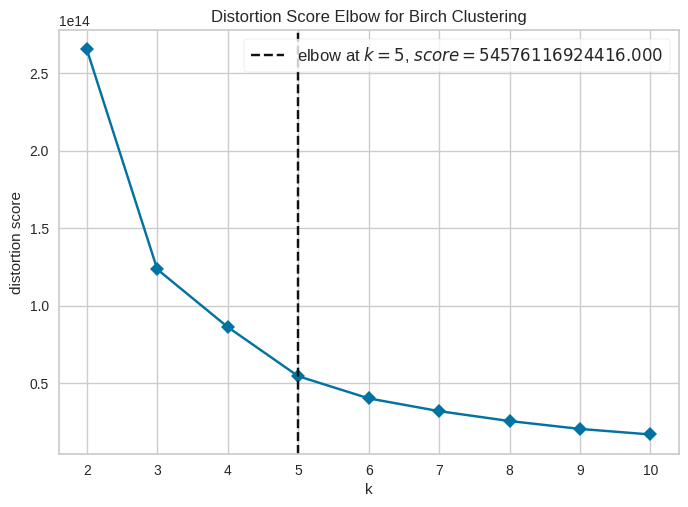

In [ ]:
setup(data, verbose=False)
r101 = []
r102 = []
r103 = []
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r101.append(silhouette_score(data,labels))
r101.append(calinski_harabasz_score(data,labels))
r101.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r102.append(silhouette_score(data,labels))
r102.append(calinski_harabasz_score(data,labels))
r102.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r103.append(silhouette_score(data,labels))
r103.append(calinski_harabasz_score(data,labels))
r103.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

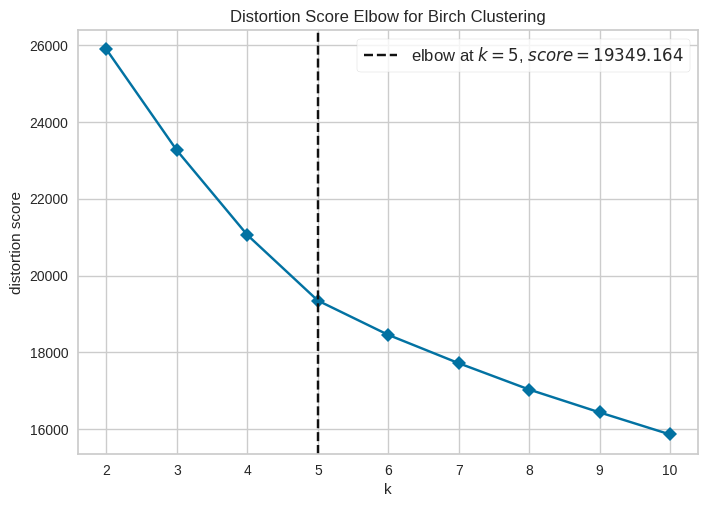

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r104 = []
r105 = []
r106 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r104.append(silhouette_score(data,labels))
r104.append(calinski_harabasz_score(data,labels))
r104.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r105.append(silhouette_score(data,labels))
r105.append(calinski_harabasz_score(data,labels))
r105.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r106.append(silhouette_score(data,labels))
r106.append(calinski_harabasz_score(data,labels))
r106.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

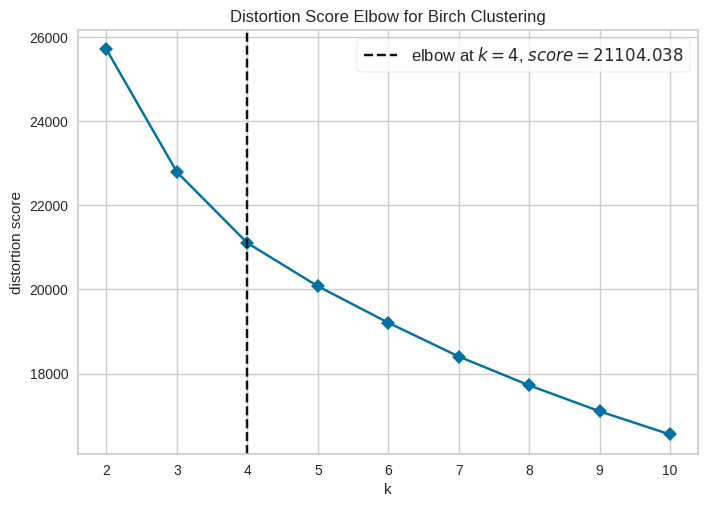

In [ ]:
setup(data = data, transformation = True, transformation_method = 'quantile', verbose=False)
r107 = []
r108 = []
r109 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r107.append(silhouette_score(data,labels))
r107.append(calinski_harabasz_score(data,labels))
r107.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r108.append(silhouette_score(data,labels))
r108.append(calinski_harabasz_score(data,labels))
r108.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r109.append(silhouette_score(data,labels))
r109.append(calinski_harabasz_score(data,labels))
r109.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

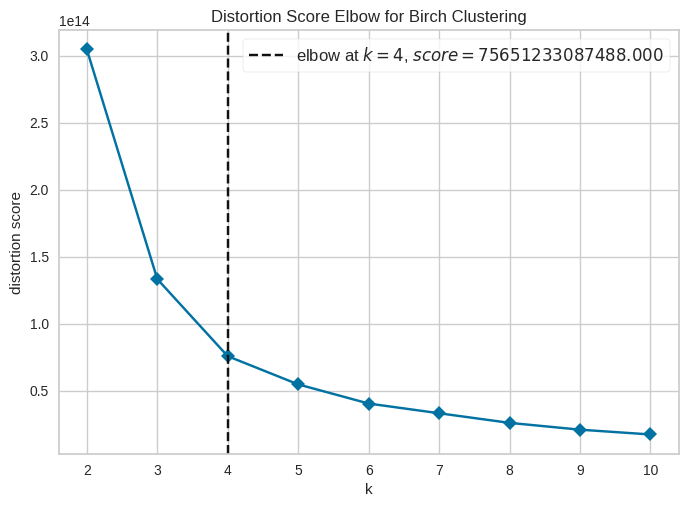

In [ ]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r110 = []
r111 = []
r112 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r110.append(silhouette_score(data,labels))
r110.append(calinski_harabasz_score(data,labels))
r110.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r111.append(silhouette_score(data,labels))
r111.append(calinski_harabasz_score(data,labels))
r111.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r112.append(silhouette_score(data,labels))
r112.append(calinski_harabasz_score(data,labels))
r112.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

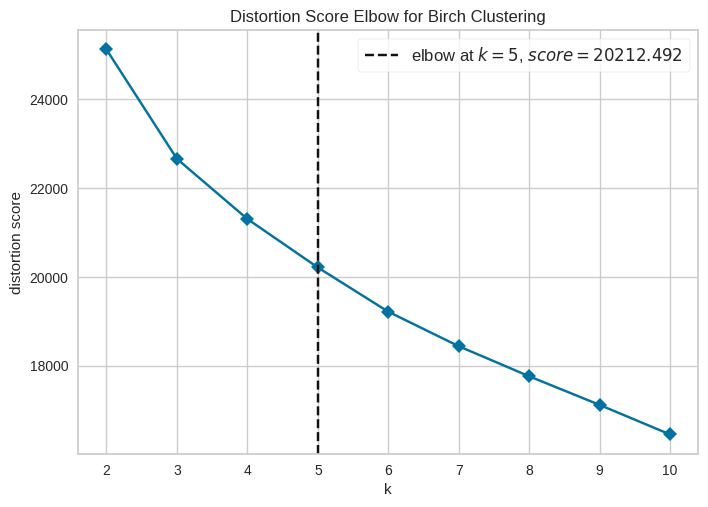

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'quantile', verbose=False)
r113 = []
r114 = []
r115 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r113.append(silhouette_score(data,labels))
r113.append(calinski_harabasz_score(data,labels))
r113.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r114.append(silhouette_score(data,labels))
r114.append(calinski_harabasz_score(data,labels))
r114.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r115.append(silhouette_score(data,labels))
r115.append(calinski_harabasz_score(data,labels))
r115.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

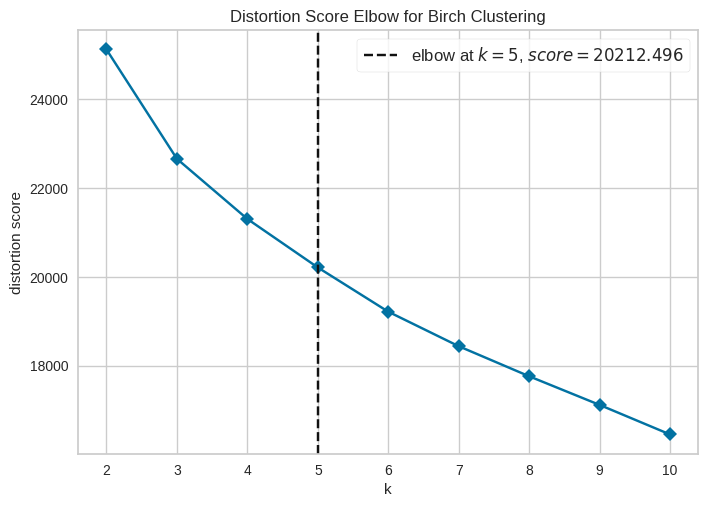

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'quantile',
      pca = True, pca_method = 'linear', verbose=False)

r116 = []
r117 = []
r118 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r116.append(silhouette_score(data,labels))
r116.append(calinski_harabasz_score(data,labels))
r116.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r117.append(silhouette_score(data,labels))
r117.append(calinski_harabasz_score(data,labels))
r117.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r118.append(silhouette_score(data,labels))
r118.append(calinski_harabasz_score(data,labels))
r118.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [ ]:
result3 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r101,'No Data Processing(c=4)': r102,'No Data Processing(c=5)': r103,
           'Using Normalization(c=3)' : r104,'Using Normalization(c=4)' : r105,'Using Normalization(c=5)' : r106,
           'Using Transform(c=3)' : r107,'Using Transform(c=4)' : r108,'Using Transform(c=5)' : r109,
           'Using PCA(c=3)' : r110,'Using PCA(c=4)' : r111,'Using PCA(c=5)' : r112,
           'Using T + N(c=3)': r113,'Using T + N(c=4)': r114,'Using T + N(c=5)': r115,
           'T + N + PCA(c=3)': r116,'T + N + PCA(c=4)': r117,'T + N + PCA(c=5)': r118}

In [ ]:
result3df = pd.DataFrame(result3)

# Results

In [ ]:
print("Using K-Means Clustering")
result1df


Using K-Means Clustering


Parameters  No Data Processing(c=3)  No Data Processing(c=4)  \
0         Silhouette                 0.522068                 0.517919   
1  Calinski-Harabasz             10633.671475             12670.008743   
2    Davies-Bouldins                 0.571605                 0.559701   

   No Data Processing(c=5)  Using Normalization(c=3)  \
0                 0.511561                  0.521682   
1             14454.747224              10632.143908   
2                 0.555961                  0.571797   

   Using Normalization(c=4)  Using Normalization(c=5)  Using Transform(c=3)  \
0                  0.521098                  0.511569              0.521697   
1              12687.250584              14454.459960          10632.724676   
2                  0.555970                  0.555942              0.571798   

   Using Transform(c=4)  Using Transform(c=5)  Using PCA(c=3)  Using PCA(c=4)  \
0              0.517919              0.511546        0.522068        0.517908   
1          12670.008743          14454.788445    10633.671475    12669.865792   
2              0.559701              0.555979        0.571605        0.559633   

   Using PCA(c=5)  Using T + N(c=3)  Using T + N(c=4)  Using T + N(c=5)  \
0        0.509309          0.522068          0.521098          0.509299   
1    14413.638004      10633.671475      12687.250584      14415.124050   
2        0.552414          0.571605          0.555970          0.552537   

   T + N + PCA(c=3)  T + N + PCA(c=4)  T + N + PCA(c=5)  
0          0.522068          0.517919          0.510452  
1      10633.671475      12670.008743      14452.086611  
2          0.571605          0.559701          0.554144

In [ ]:
print("Using Hierarchical Clustering")
result2df


Using Hierarchical Clustering


Parameters  No Data Processing(c=3)  No Data Processing(c=4)  \
0         Silhouette                 0.496041                 0.507330   
1  Calinski-Harabasz              9212.539321             12079.682039   
2    Davies-Bouldins                 0.550843                 0.574813   

   No Data Processing(c=5)  Using Normalization(c=3)  \
0                 0.506561                  0.496041   
1             13029.044251               9212.539321   
2                 0.554718                  0.550843   

   Using Normalization(c=4)  Using Normalization(c=5)  Using Transform(c=3)  \
0                  0.507330                  0.506561              0.496041   
1              12079.682039              13029.044251           9212.539321   
2                  0.574813                  0.554718              0.550843   

   Using Transform(c=4)  Using Transform(c=5)  Using PCA(c=3)  Using PCA(c=4)  \
0              0.507330              0.506561        0.496041        0.507330   
1          12079.682039          13029.044251     9212.539321    12079.682039   
2              0.574813              0.554718        0.550843        0.574813   

   Using PCA(c=5)  Using T + N(c=3)  Using T + N(c=4)  Using T + N(c=5)  \
0        0.506561          0.496041          0.507330          0.506561   
1    13029.044251       9212.539321      12079.682039      13029.044251   
2        0.554718          0.550843          0.574813          0.554718   

   T + N + PCA(c=3)  T + N + PCA(c=4)  T + N + PCA(c=5)  
0          0.496041          0.507330          0.506561  
1       9212.539321      12079.682039      13029.044251  
2          0.550843          0.574813          0.554718

In [ ]:
print("Using Birch Clustering")
result3df

Using Birch Clustering


Parameters  No Data Processing(c=3)  No Data Processing(c=4)  \
0         Silhouette                 0.496041                 0.507330   
1  Calinski-Harabasz              9212.539321             12079.682039   
2    Davies-Bouldins                 0.550843                 0.574813   

   No Data Processing(c=5)  Using Normalization(c=3)  \
0                 0.506561                  0.496041   
1             13029.044251               9212.539321   
2                 0.554718                  0.550843   

   Using Normalization(c=4)  Using Normalization(c=5)  Using Transform(c=3)  \
0                  0.507330                  0.506561              0.496041   
1              12079.682039              13029.044251           9212.539321   
2                  0.574813                  0.554718              0.550843   

   Using Transform(c=4)  Using Transform(c=5)  Using PCA(c=3)  Using PCA(c=4)  \
0              0.507330              0.506561        0.496041        0.507330   
1          12079.682039          13029.044251     9212.539321    12079.682039   
2              0.574813              0.554718        0.550843        0.574813   

   Using PCA(c=5)  Using T + N(c=3)  Using T + N(c=4)  Using T + N(c=5)  \
0        0.506561          0.496041          0.507330          0.506561   
1    13029.044251       9212.539321      12079.682039      13029.044251   
2        0.554718          0.550843          0.574813          0.554718   

   T + N + PCA(c=3)  T + N + PCA(c=4)  T + N + PCA(c=5)  
0          0.496041          0.507330          0.506561  
1       9212.539321      12079.682039      13029.044251  
2          0.550843          0.574813          0.554718